In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from zipfile import ZipFile
import os 
import requests as re
import pandas as pd

In [2]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [51]:
navegador_dados_abertos = webdriver.Chrome(chrome_options= chrome_options)

navegador_dados_abertos.get('https://dados.gov.br/dataset/anatel-utilidade-publica/resource/3e906fc3-a3cc-4f0a-998a-0af293f81aff')
WebDriverWait(navegador_dados_abertos, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="content"]/div[3]/section/div[1]/div[1]/ul/li/a'))).click()
WebDriverWait(navegador_dados_abertos, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="content"]/div[3]/section/div[1]/p/a'))).click()
# navegador.find_element_by_xpath('').click()

<ipython-input-51-bfd793549037>:1: DeprecationWarning: use options instead of chrome_options
  navegador_dados_abertos = webdriver.Chrome(chrome_options= chrome_options)


KeyboardInterrupt: 

In [3]:
pasta = "C:\\Users\\wesle\\Documents\\"
dados = os.path.join(pasta, "notificacoes_alertas.zip")

with ZipFile(dados) as z:
    with z.open(f'notificacoes_alertas_tabela.csv') as f:
        dados_alerta = pd.read_csv(f, sep=';', error_bad_lines=False)

In [ ]:
dados_alerta.info()

In [4]:
dados_limpos=dados_alerta.drop(columns=['-'])

In [5]:
dados_limpos['Data'] = pd.to_datetime(dados_limpos['Data'], errors='coerce')

In [6]:
dados_limpos['Data do alerta'] = dados_limpos['Data'].dt.strftime('%d-%m-%Y')
dados_limpos['Hora do alerta'] = dados_limpos['Data'].dt.strftime('%H:%M:%S')

In [7]:
del dados_limpos['Data']

In [8]:
dados_limpos['Data'] = pd.to_datetime(dados_limpos['Data do alerta'], errors='coerce')

In [12]:
del dados_limpos['Data do alerta']

In [13]:
dados_NI = dados_limpos.loc[(dados_limpos['UF'] == 'RJ') & (dados_limpos["Código IBGE"] == 3303500) & (dados_limpos["Data"] < '2022-01-01')]

In [14]:
dados_NI.head()

,Forma de Envio,Código do Alerta,Mensagem,Tipo de Alerta,Município,Código IBGE,UF,Hora do alerta,Data
734509,SMS,12175/2019,Defesa Civil: Mudanca para estagio de ATENCAO ...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,21:00:11,2019-04-28
734510,SMS,12166/2019,Defesa Civil: Previsao de chuva moderada a for...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,19:46:47,2019-04-28
734511,SMS,13802/2019,Defesa Civil: Previsao de rajadas de vento mod...,VENDAVAL,Nova Iguaçu (RJ),3303500,RJ,23:27:02,2019-08-31
734512,SMS,9354/2020,Defesa Civil:Ha previsao de pancadas de chuva ...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,08:46:22,2020-06-14
734514,SMS,6454/2021,Defesa Civil:Mudanca para ESTAGIO DE ATENCAO N...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,17:11:46,2021-03-05


<AxesSubplot:xlabel='Data'>

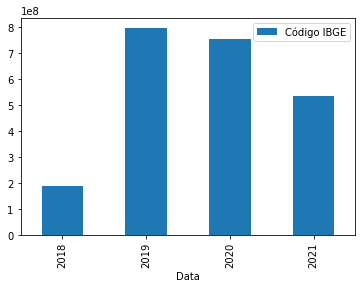

In [15]:
dados_NI.groupby(dados_NI['Data'].dt.year).sum().plot.bar()

In [16]:
dados_NI['Tipo de Alerta'].value_counts(normalize=True)*100

CHUVAS INTENSAS                                                                            83.623188
VENDAVAL                                                                                    5.507246
ALAGAMENTOS                                                                                 4.057971
DOENÇAS INFECCIOSAS VIRAIS                                                                  2.463768
BAIXA UMIDADE DO AR                                                                         2.318841
INUNDAÇÕES                                                                                  0.869565
DESLIZAMENTOS                                                                               0.579710
ONDA DE FRIO - FRIAGEM                                                                      0.144928
FRENTES FRIAS/ZONAS DE CONVERGÊNCIA                                                         0.144928
INCÊNDIO FLORESTAL - INCÊNDIOS EM ÁREAS NÃO PROTEGIDAS, COM REFLEXOS NA QUALIDADE DO AR    

In [23]:
dados_NI_chuva_intensa = dados_NI.loc[(dados_NI["Tipo de Alerta"] == "CHUVAS INTENSAS")]
dados_NI_chuva_intensa.head()

,Forma de Envio,Código do Alerta,Mensagem,Tipo de Alerta,Município,Código IBGE,UF,Hora do alerta,Data
734509,SMS,12175/2019,Defesa Civil: Mudanca para estagio de ATENCAO ...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,21:00:11,2019-04-28
734510,SMS,12166/2019,Defesa Civil: Previsao de chuva moderada a for...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,19:46:47,2019-04-28
734512,SMS,9354/2020,Defesa Civil:Ha previsao de pancadas de chuva ...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,08:46:22,2020-06-14
734514,SMS,6454/2021,Defesa Civil:Mudanca para ESTAGIO DE ATENCAO N...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,17:11:46,2021-03-05
734516,SMS,1063/2019,Defesa Civil:Previsao de pancadas de chuva iso...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,12:56:25,2019-10-30


### Analise dos alertas no ano de 2022 

In [26]:
dados_NI_2022 = dados_limpos.loc[(dados_limpos['UF'] == 'RJ') & (dados_limpos["Código IBGE"] == 3303500)&(dados_limpos["Data"] > '2022-01-01')].reset_index(drop=True)

In [27]:
dados_NI_2022.head()

,Forma de Envio,Código do Alerta,Mensagem,Tipo de Alerta,Município,Código IBGE,UF,Hora do alerta,Data
0,SMS,6210/2022,Defesa Civil:ATENCAO! PERMANECE A PREVISAO DE ...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,20:06:30,2022-03-31
1,SMS,6329/2022,Defesa Civil:Alerta Maximo em Nova Iguacu. Ha ...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,12:26:41,2022-04-02
2,SMS,6365/2022,Defesa Civil:ESTAGIO DE CRISE em Nova Iguacu -...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,11:51:33,2022-04-03
3,SMS,6144/2022,Defesa Civil:ESTAGIO DE OBSERVACAO em Nova Igu...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,10:49:40,2022-03-31
4,SMS,6328/2022,Defesa Civil:A cidade de Nova Iguacu permanece...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,12:12:25,2022-04-02


In [28]:
analise_alertas = dados_NI_2022['Tipo de Alerta'].value_counts(normalize=True)*100
analise_alertas

CHUVAS INTENSAS        86.075949
VENDAVAL                7.594937
BAIXA UMIDADE DO AR     3.797468
ALAGAMENTOS             2.531646
Name: Tipo de Alerta, dtype: float64

<AxesSubplot:title={'center':'Analise de Alertas em 2022'}>

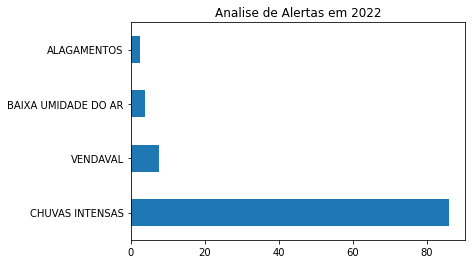

In [29]:
analise_alertas.plot(kind='barh', title='Analise de Alertas em 2022')

In [30]:
dados_NI_2022_chuva_intensa = dados_NI_2022.loc[(dados_NI_2022["Tipo de Alerta"] == "CHUVAS INTENSAS")]

In [31]:
dados_NI_2022_chuva_intensa

,Forma de Envio,Código do Alerta,Mensagem,Tipo de Alerta,Município,Código IBGE,UF,Hora do alerta,Data
0,SMS,6210/2022,Defesa Civil:ATENCAO! PERMANECE A PREVISAO DE ...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,20:06:30,2022-03-31
1,SMS,6329/2022,Defesa Civil:Alerta Maximo em Nova Iguacu. Ha ...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,12:26:41,2022-04-02
2,SMS,6365/2022,Defesa Civil:ESTAGIO DE CRISE em Nova Iguacu -...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,11:51:33,2022-04-03
3,SMS,6144/2022,Defesa Civil:ESTAGIO DE OBSERVACAO em Nova Igu...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,10:49:40,2022-03-31
4,SMS,6328/2022,Defesa Civil:A cidade de Nova Iguacu permanece...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,12:12:25,2022-04-02
...,...,...,...,...,...,...,...,...,...
74,SMS,5061/2022,Defesa Civil:Previsao de pancadas isoladas de ...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,19:41:15,2022-03-11
75,SMS,2926/2022,Defesa Civil:05/02 15:30h - Mudanca para ESTAG...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,15:42:19,2022-02-05
76,SMS,7328/2022,Defesa Civil:Previsao de pancadas de chuva mod...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,07:33:20,2022-05-16
77,SMS,3064/2022,Defesa Civil:07/02- Nova Iguacu permanece em e...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,10:40:48,2022-02-07


## Raspagem do dados

In [ ]:
navegador_inmet = webdriver.Chrome(chrome_options= chrome_options)

navegador_inmet.get('https://portal.inmet.gov.br/')
navegador_inmet.find_element_by_xpath('//*[@id="dataset-resources"]/ul/li[1]')
navegador_inmet.find_element_by_xpath('//*[@id="content"]/div[3]/section/div[1]/p/a')
# WebDriverWait(navegador_inmet, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="dataset-resources"]/ul/li[1]'))).click()
# WebDriverWait(navegador_inmet, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="content"]/div[3]/section/div[1]/p/a'))).click()

In [32]:
pasta_INMT = "C:\\Users\\wesle\\Documents\\"
dados_INMT = os.path.join(pasta_INMT, "dados_precipitacao_2022.zip")

with ZipFile(dados_INMT) as z:
    with z.open(f'dados_A603_D_2022-01-01_2022-07-31.csv') as f:
        dados_precipitacao = pd.read_csv(f, sep=';', error_bad_lines= False)

In [33]:
dados_precipitacao.head()
dados_precipitacao = dados_precipitacao.rename(columns={'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)': 'Precipitação Total diaria(mm)'})

In [36]:
dados_precipitacao['Data'] = pd.to_datetime(dados_precipitacao['Data Medicao'], errors='coerce')
del(dados_precipitacao['Data Medicao'])

In [37]:
dados_precipitacao

,Precipitação Total diaria(mm),Data
0,"1,2",2022-01-01
1,3,2022-02-01
2,"4,4",2022-03-01
3,"0,2",2022-04-01
4,0,2022-05-01
...,...,...
207,0,2022-07-27
208,"0,2",2022-07-28
209,0,2022-07-29
210,"14,2",2022-07-30


In [44]:
Dias_mais_chuvosos_NI_2022 = pd.merge(dados_NI_2022_chuva_intensa,dados_precipitacao ,how = 'inner', on = 'Data')

In [55]:
Dias_mais_chuvosos_NI_2022.head()

,Forma de Envio,Código do Alerta,Mensagem,Tipo de Alerta,Município,Código IBGE,UF,Hora do alerta,Data,Precipitação Total diaria(mm)
0,SMS,6210/2022,Defesa Civil:ATENCAO! PERMANECE A PREVISAO DE ...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,20:06:30,2022-03-31,"9,2"
1,SMS,6144/2022,Defesa Civil:ESTAGIO DE OBSERVACAO em Nova Igu...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,10:49:40,2022-03-31,"9,2"
2,SMS,6130/2022,Defesa Civil:ESTAGIO DE OBSERVACAO em Nova Igu...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,03:04:01,2022-03-31,"9,2"
3,SMS,6224/2022,Defesa Civil:Mudanca para ESTAGIO DE ATENCAO e...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,22:34:14,2022-03-31,"9,2"
4,TVA,6211/2022,Defesa Civil:Chuvas intensas nas proximas hora...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,20:06:32,2022-03-31,"9,2"


In [58]:
Dias_mais_chuvosos_NI_2022['mes']= Dias_mais_chuvosos_NI_2022['Data'].dt.month

In [65]:
Dias_mais_chuvosos_NI_2022.head()

,Forma de Envio,Código do Alerta,Mensagem,Tipo de Alerta,Município,Código IBGE,UF,Hora do alerta,Data,Precipitação Total diaria(mm),mes
0,SMS,6210/2022,Defesa Civil:ATENCAO! PERMANECE A PREVISAO DE ...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,20:06:30,2022-03-31,"9,2",3
1,SMS,6144/2022,Defesa Civil:ESTAGIO DE OBSERVACAO em Nova Igu...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,10:49:40,2022-03-31,"9,2",3
2,SMS,6130/2022,Defesa Civil:ESTAGIO DE OBSERVACAO em Nova Igu...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,03:04:01,2022-03-31,"9,2",3
3,SMS,6224/2022,Defesa Civil:Mudanca para ESTAGIO DE ATENCAO e...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,22:34:14,2022-03-31,"9,2",3
4,TVA,6211/2022,Defesa Civil:Chuvas intensas nas proximas hora...,CHUVAS INTENSAS,Nova Iguaçu (RJ),3303500,RJ,20:06:32,2022-03-31,"9,2",3


In [67]:
por_mes = Dias_mais_chuvosos_NI_2022['mes'].value_counts(normalize=True)*100

In [68]:
precipitacao_por_mes = Dias_mais_chuvosos_NI_2022['Precipitação Total diaria(mm)'].value_counts(normalize=True)*100

In [64]:
por_mes

3    25.925926
2    25.925926
4    24.074074
1    16.666667
5     7.407407
Name: mes, dtype: float64

In [69]:
precipitacao_por_mes

0       44.444444
0,2     12.962963
9,2     11.111111
17,8     3.703704
51,8     1.851852
28,4     1.851852
42       1.851852
2,6      1.851852
17,2     1.851852
12,2     1.851852
20,6     1.851852
0,8      1.851852
3        1.851852
1        1.851852
21,8     1.851852
19       1.851852
11,8     1.851852
15,2     1.851852
56       1.851852
Name: Precipitação Total diaria(mm), dtype: float64

## Cruzamento com os dados do IBGE

In [ ]:
soup = BeautifulSoup(html1,html2, 'html.parser')

In [ ]:
votos = []

for deputado in soup.find_all("div", attrs={"class": "custom-representative"}):
  dados_deputado = []
  dados_deputado.append(deputado['data-choice']) #voto
  resultado_busca_nome = re.search(r'.*Federal (.*)\((.*?)–(.*?)\)',deputado.img['alt'])
  dados_deputado.append(resultado_busca_nome.group(1)) #nome
  dados_deputado.append(resultado_busca_nome.group(2)) #partido
  dados_deputado.append(resultado_busca_nome.group(3)) #estado
  dados_deputado.append(deputado.img['src']) #link